In [52]:
# Importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [53]:
# Reading the Dataset 
data= pd.read_csv('Student scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [54]:
# Displaying the first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


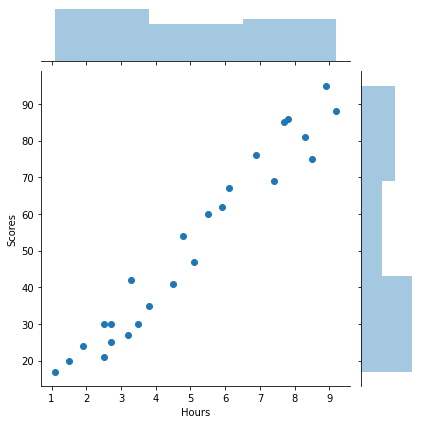

In [55]:
# Plotting the distribution of Scores using joinplots
sns.jointplot('Hours','Scores',data)

Preparing the Data

In [56]:
# Using sklearn 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# The next step is to divide the data into attribute (input) and labels (output)
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [58]:
# Splitting the data into test and training set using train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size= 0.2)

In [59]:
X_train.shape,Y_train.shape

((20, 1), (20,))

In [60]:
X_test.shape,Y_test.shape

((5, 1), (5,))

In [61]:
model = linear_model.LinearRegression()

In [62]:
model.fit(X_train,Y_train)

LinearRegression()

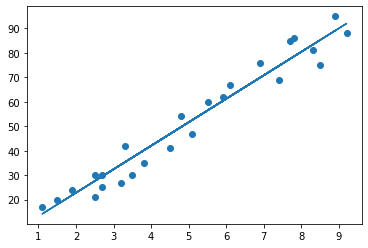

In [63]:
#Plotting the regression line
line = model.coef_*X+model.intercept_

#Plotting for test data
plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

In [64]:
# Predicting the scores for test set
y_pred= model.predict(X_test)
y_pred

array([46.83907115, 60.29823891, 83.37109793, 69.91193017, 27.61168863])

In [65]:
# Comparing actual versus predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,41,46.839071
1,62,60.298239
2,81,83.371098
3,76,69.911930
4,21,27.611689


In [66]:
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error (MSE):%.2f'% mean_squared_error(Y_test,y_pred))
print('Coefficient of Determination (R^2): ', r2_score(Y_test,y_pred))

Coefficient: [9.61369126]
Intercept: 3.5774604824655327
Mean Squared Error (MSE):24.68
Coefficient of Determination (R^2):  0.9508555564461046


In [67]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
pred_score=model.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 92.50410462592103
